In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [63]:
dataset = pd.read_excel("Adidas Dataset.xlsx")
dataset = dataset.drop(['Invoice Date', 'Retailer ID'], axis=1)
dataset.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [64]:
encoder = LabelEncoder()
categorical_columns = ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']
for column in categorical_columns:
    dataset[column] = encoder.fit_transform(dataset[column])
dataset.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,1,1,31,35,2,50.0,1200,600000.0,300000.0,0.50,0
1,1,1,31,35,1,50.0,1000,500000.0,150000.0,0.30,0
2,1,1,31,35,5,40.0,1000,400000.0,140000.0,0.35,0
3,1,1,31,35,4,45.0,850,382500.0,133875.0,0.35,0
4,1,1,31,35,0,60.0,900,540000.0,162000.0,0.30,0


In [65]:
x = dataset.drop('Total Sales', axis=1)
y = dataset['Total Sales']

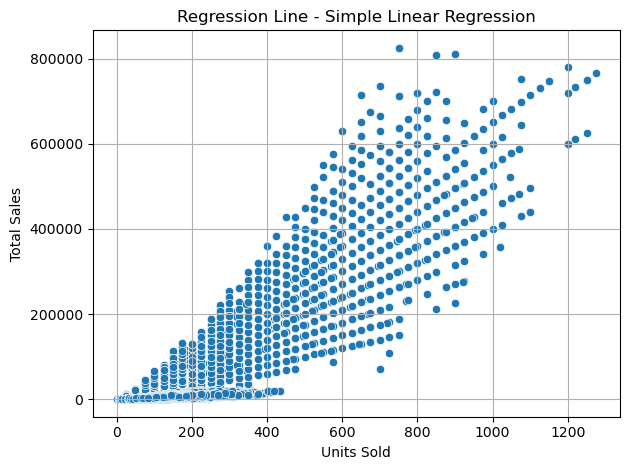

In [66]:
import seaborn as sns
sns.scatterplot(x=dataset['Units Sold'], y=dataset['Total Sales'])
plt.xlabel("Units Sold")
plt.ylabel("Total Sales")
plt.title("Regression Line - Simple Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [68]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 19531.90783859993
Mean Squared Error (MSE): 957060553.4528524
Root Mean Squared Error (RMSE): 30936.395288605498
R² Score: 0.9541523123477922


In [69]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for col, coef in zip(x.columns, model.coef_):
    print(f"{col}: {coef}")

Intercept: 35963.89920573178
Coefficients:
Retailer: 342.29048021667046
Region: -1048.752312955767
State: -54.39503981857972
City: 95.15418603797269
Product: 562.3122396845365
Price per Unit: 825.4616889262254
Units Sold: 170.5051768169755
Operating Profit: 1.7401171237749704
Operating Margin: -189948.7952106428
Sales Method: -4268.203374268945


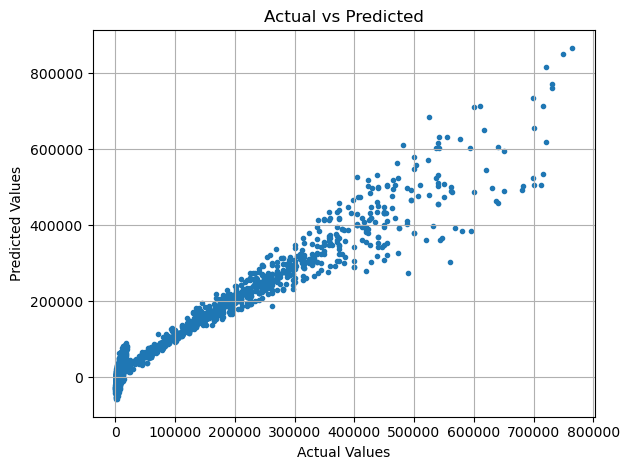

In [70]:
plt.scatter(y_test, y_pred, marker='.')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

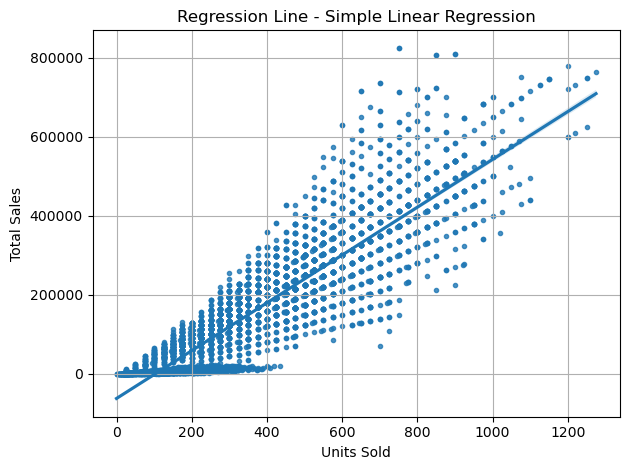

In [71]:
import seaborn as sns
sns.regplot(x=dataset['Units Sold'], y=dataset['Total Sales'], marker='.')
plt.xlabel("Units Sold")
plt.ylabel("Total Sales")
plt.title("Regression Line - Simple Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()